## 4. Scipy로 공부하는 확률 변수

## 01장. Scipy의 확률 분포 기능

### 1. Scipy의 확률 분포 기능

- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지다. SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공한다.


In [19]:
import scipy as sp
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl

In [20]:
mpl.rcParams["font.family"]
mpl.matplotlib_fname()
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


In [ ]:
# 1. 확률 분포 객체 생성 (각 분포에 맞는 객체를 생성한다.)
# 2. 확률 분포 객체의 메서드 호출

In [1]:
# scipy.stats 서브패키지 안에 명령이 포함되어 있다.

In [4]:
import scipy as sp

In [6]:
# 확률 분포 객체 생성 가우시안 정규분포를 따르는 객체를 생성
rv = sp.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

In [7]:
rv = sp.stats.norm(loc=1, scale=2)

## 확률 분포 메서드
- pdf, pmf, cdf, rvs

### 확률 밀도 함수

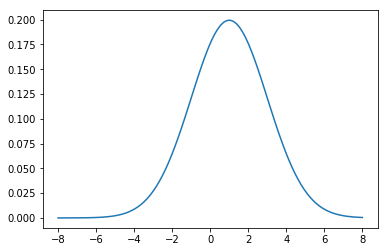

In [9]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

### 누적 분포 함수

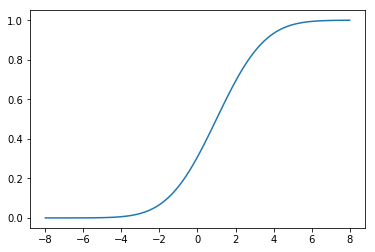

In [12]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.show()

### 랜덤 샘플 생성

In [13]:
# size : 샘플 생성시 생성될 샘플의 크기
# random_state : 샘플 생성시 사용되는 시드 값
rv.rvs(size=(3,5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


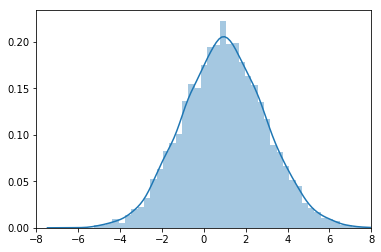

In [14]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-8, 8)
plt.show()

## 베르누이 확률 변수

In [21]:
# Bern(x;theta) : x가 theta라는 확률을 가진다.
theta = 0.6
rv = sp.stats.bernoulli(theta)

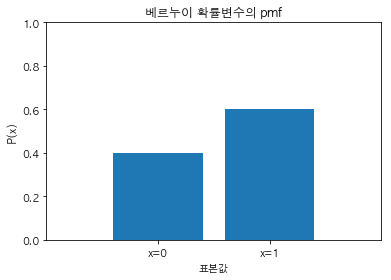

In [22]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 pmf")
plt.show()

In [24]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

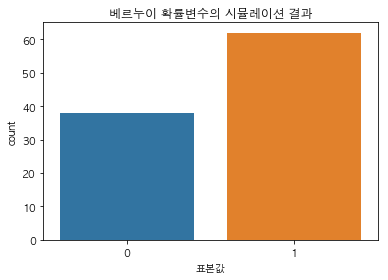

In [25]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

## 02장. 이산 확률 분포

### 1. 베르누이 분포

### 2. 이항 분포

In [26]:
N = 10
theta = 0.6 # 앞면이 나오는 확률을 높게 설정해서 오른쪽으로 좀 붙었다.
rv = sp.stats.binom(N, theta)
rv

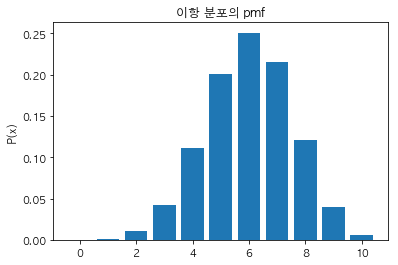

In [27]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

In [28]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

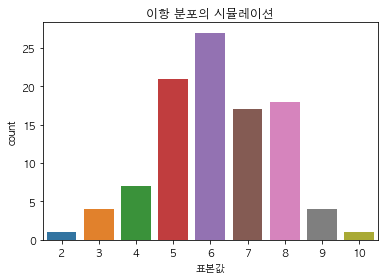

In [29]:
sns.countplot(x)
plt.title("이항 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

In [30]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.000000
1,0,이론,0.000105
2,1,시뮬레이션,0.000000
3,1,이론,0.001573
4,2,시뮬레이션,0.010000
5,2,이론,0.010617
6,3,시뮬레이션,0.040000
7,3,이론,0.042467
8,4,시뮬레이션,0.070000
9,4,이론,0.111477


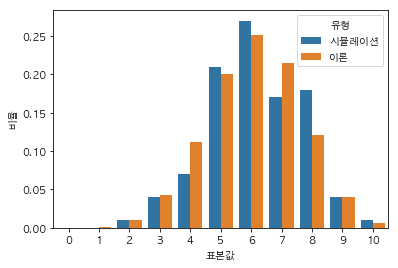

In [31]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

In [34]:
N = 5
theta = 0.5
rv = sp.stats.binom(N, theta)
rv

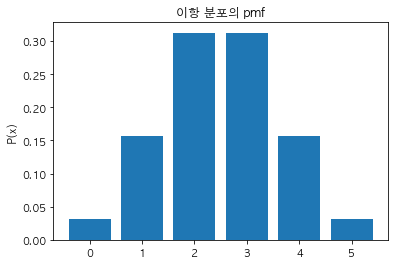

In [35]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

In [36]:
N = 20
theta = 0.9
rv = sp.stats.binom(N, theta)
rv

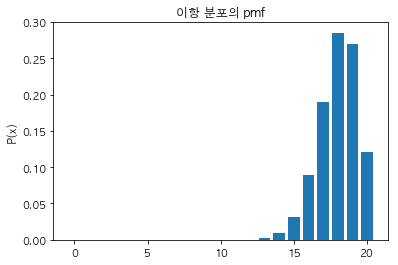

In [37]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

In [ ]:
np.random.seed(0)
x = rv.rvs(100)
x

### 3. 카테고리 분포

In [ ]:
# fair한 주사위를 만든 후
# 모델링 해주기 위해서 one hot encoding 해준다.
# 실제로 던져보자 100번 던져서 5개만 뽑아서 본다.
# 각 숫자 나온걸 직접 카운팅 해보면 비교해 볼 수 있다.
# 세타 다른 값으로 실행해보자
# 0이 아닌 가장 작은 값 eps 넣었다. 0 넣으면 에러 나서

### 4. 다항 분포

In [ ]:
# 30번 던지는 것이 한세트 이고 그게 샘플 하나이다. N으로 넣어줌

# 앞의 시각화와 좀 다르다. 1이 나온 횟수는 얼마인지 알려줬다면
# 다항 분포 3이 몇번 나오는지의 답이 분포가 되어서 히스토그램으로 그려줘야한다.

# 각 열벡터를 히스토그램으로 그리면 된다.
# 다항 분포의 기댓값을 가지고 계산한다. 3이 나올 확률이 0.1 이였으니까

# 히스토그램 여섯 개 나와서 boxplot 1~6이 몇번 나오는지 한번에 알려준다.

# jitter = True 하면 discrete한 애들이라서 한줄에 많이 찍히기때문에 흔들어 준다.

#  histogram 모양을 바이올린 플롯으로 나타낸 후

- - -

## 2장 정규 분포와 통계량 분포

### 1. 가우시안 정규 분포

In [ ]:
# 가장 작은 것부터 큰 값까지 sorting한다.
# 분위함수 값을 구한다. 하위 %인지 구한다.
# 큰 값은 90% 작은값은 10% 되는 아이들 (통계 하위부터 따진다.)
# 하위 %이면 cdf이용해서 구한다.
# qq플롯그리는 여러개의 명령이 있지만

# sp.stats.probplot(x, plot=plt)  원래 플롯 그리는 애 아니라서 인수에 저렇게 plt줘야함



In [38]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

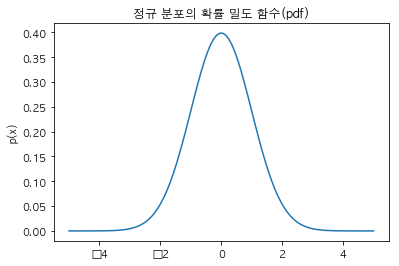

In [39]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("정규 분포의 확률 밀도 함수(pdf)")
plt.show()

In [40]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


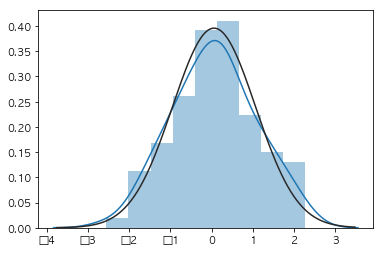

In [41]:
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.show()

## QQ플롯

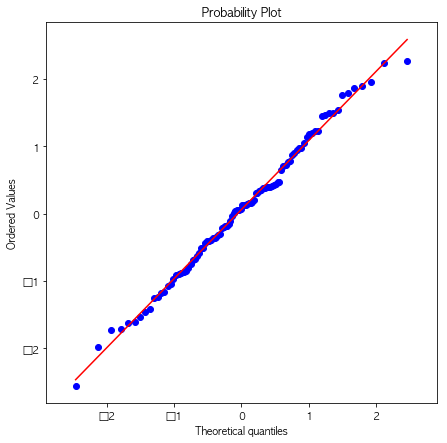

In [44]:
np.random.seed(0)
x = np.random.randn(100) # 가우시안 분포로 랜덤 값 뽑아서 그린다.
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

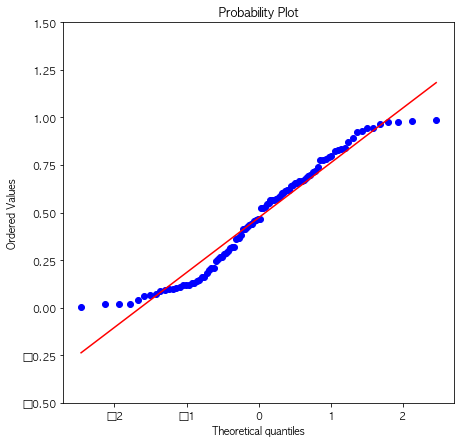

In [43]:
np.random.seed(0)
x = np.random.rand(100) # 균등분포로 x 그려서 QQ플롯 그린다.
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

## 중심 극한 정리 (Central Limit Theorem)

### 2. 스튜던트 t분포

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


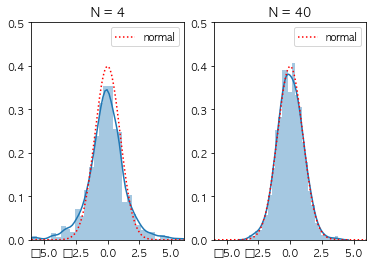

In [46]:
# 시뮬레이션 돌린 것
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 4")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 40")
plt.legend()

plt.show()